In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN, KMeans
import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit

import clustergraph.distances as d
from clustergraph.Metric_distortion_class import Metric_distortion
from clustergraph.c_GraphPreprocess import GraphPreprocess

import seaborn as sns

from dcor import distance_correlation


from clustergraph.GraphPruning import GraphPruning
from clustergraph.c_GraphPreprocess import GraphPreprocess
import clustergraph.plot_graph as pg

gene = pd.read_csv(
    "data/Gene_cancer/data.csv", sep=",", index_col=0
)  # , header = True)
headers_gene = gene.columns.values

labels = pd.read_csv("data/Gene_cancer/labels.csv", sep=",", index_col=0)

print(gene.shape, labels.shape)

(801, 20531) (801, 1)


In [2]:
sorted_index = labels.sort_values("Class").index

In [3]:
gene.loc[sorted_index]

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_341,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
sample_228,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
sample_756,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
sample_225,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
sample_445,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_477,0.0,3.190172,3.520573,7.210535,9.918593,0.0,6.625520,0.353549,0.0,0.0,...,5.981768,8.413027,9.942809,6.571789,9.900686,11.378658,10.401882,9.584258,6.867711,0.353549
sample_478,0.0,3.930822,4.049578,6.732256,9.806242,0.0,6.808784,0.000000,0.0,0.0,...,6.683977,9.104234,10.160666,4.203326,10.076268,11.021549,10.765568,10.210075,5.520705,0.000000
sample_480,0.0,2.676809,3.955629,6.639035,10.301165,0.0,7.946497,0.808426,0.0,0.0,...,6.306275,9.071972,10.136145,7.163640,10.286477,10.573922,9.523879,10.355120,3.525868,0.000000
sample_411,0.0,1.282262,2.998683,6.342914,9.983649,0.0,7.424905,0.000000,0.0,0.0,...,5.155251,8.331284,9.751116,6.144442,9.926502,11.807701,9.851009,9.582573,5.928617,0.000000


In [4]:
sorted_index = labels.sort_values("Class").index

X = gene.loc[sorted_index].to_numpy()
y = labels.loc[sorted_index].Class.to_numpy()

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_num = le.fit_transform(y)

In [5]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=100).fit_transform(X)

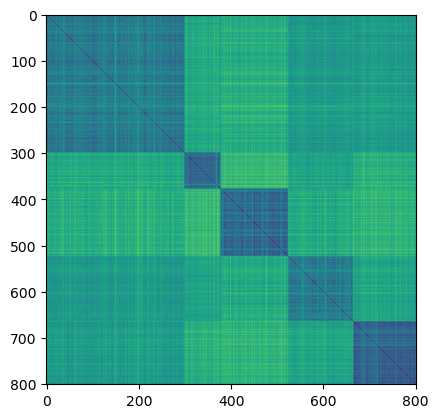

In [6]:
from sklearn.metrics import pairwise_distances

dm = pairwise_distances(X_pca)
plt.imshow(dm)

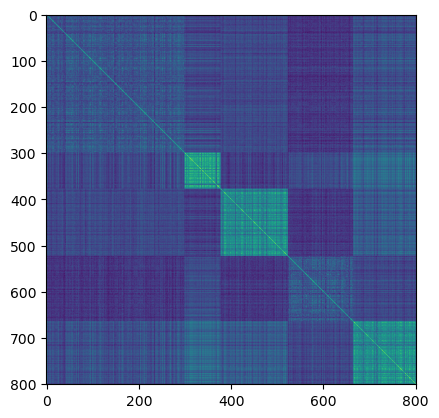

In [29]:
from sklearn.metrics import pairwise_distances

dm_dcor = 1 - pairwise_distances(X_pca, metric=distance_correlation, n_jobs=-1)
plt.imshow(dm)

In [31]:
from matplotlib import colormaps as cm
from matplotlib.colors import to_hex

classes = np.unique(labels.Class)
print(classes)

colors_dict = dict(zip(classes, cm.get_cmap("tab10")(range(len(classes)))))
print(colors_dict)

color_points = [colors_dict[l] for l in labels.loc[sorted_index].Class]
colors_hex = [to_hex(c) for c in color_points]

['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
{'BRCA': array([0.12156863, 0.46666667, 0.70588235, 1.        ]), 'COAD': array([1.        , 0.49803922, 0.05490196, 1.        ]), 'KIRC': array([0.17254902, 0.62745098, 0.17254902, 1.        ]), 'LUAD': array([0.83921569, 0.15294118, 0.15686275, 1.        ]), 'PRAD': array([0.58039216, 0.40392157, 0.74117647, 1.        ])}


In [32]:
from sklearn.neighbors import NearestNeighbors

nb = 10
neigh = NearestNeighbors(n_neighbors=nb, metric="euclidean")
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X=X, n_neighbors=nb, mode="connectivity")
nn_Graph = nx.from_scipy_sparse_array(nn_adjacency)

for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node, node)

print("Number connected components : ", nx.number_connected_components(nn_Graph))

Number connected components :  1


In [33]:
import scipy.linalg

In [34]:
scipy.linalg.issymmetric(nn_adjacency.toarray())

False

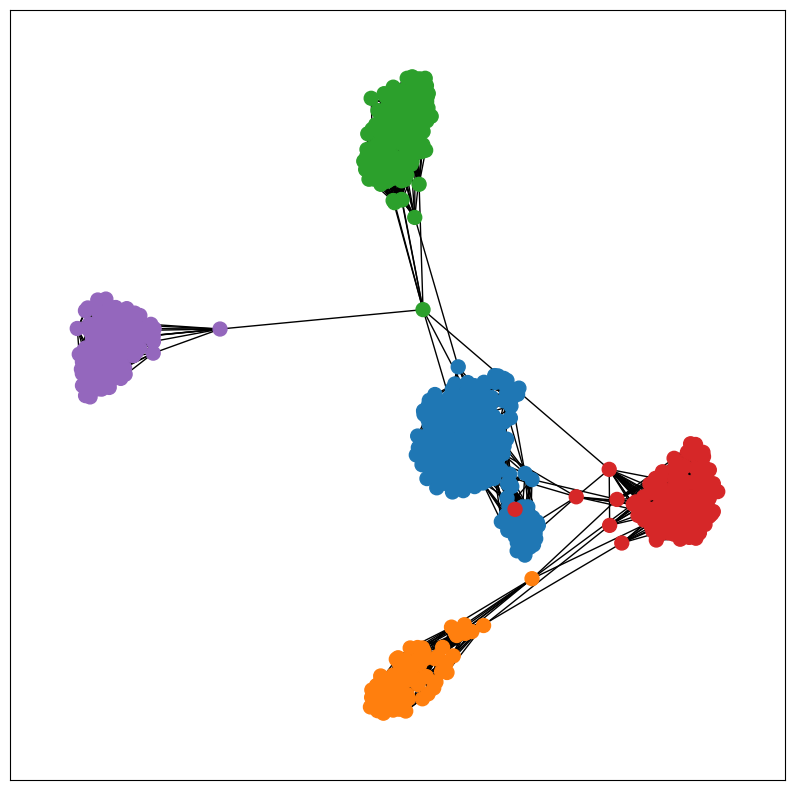

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw_networkx(nn_Graph, with_labels=False, node_color=color_points, node_size=100)

# Impact of a change of seed

In [36]:
nb_neig = 28

/Users/dgurnari/opt/anaconda3/envs/cg/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

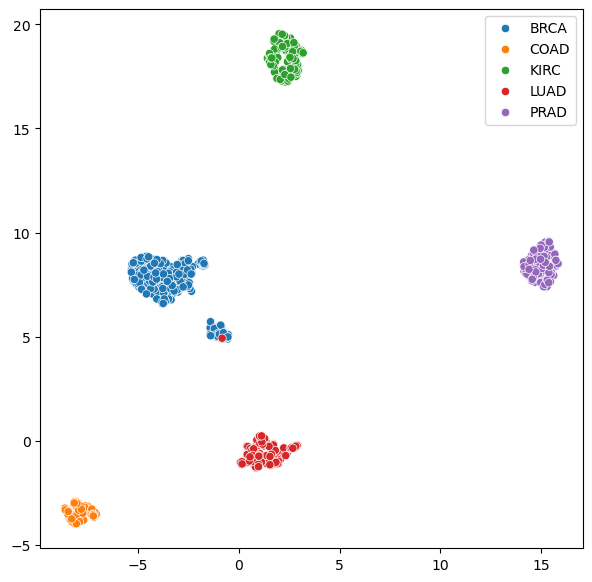

In [37]:
import umap as um

uma_42 = um.UMAP(n_neighbors=10, random_state=42)
X_umap_42 = uma_42.fit_transform(X)


fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x=X_umap_42[:, 0], y=X_umap_42[:, 1], hue=y, palette="tab10")

<Axes: >

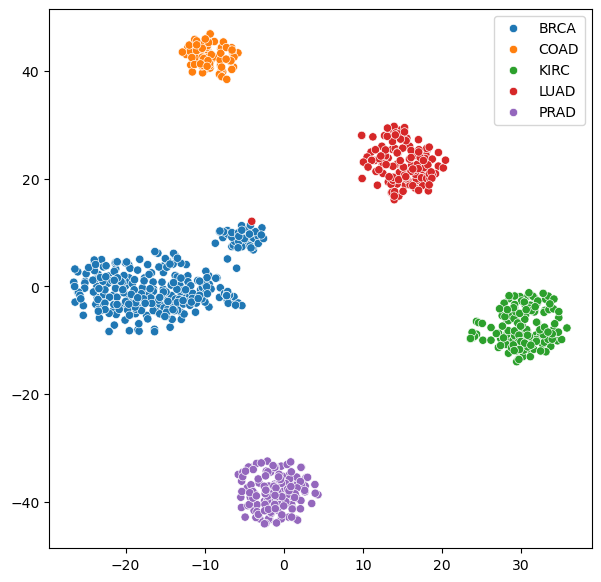

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tnse = tsne.fit_transform(X)


fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x=X_tnse[:, 0], y=X_tnse[:, 1], hue=y, palette="tab10")

# ClusterGraph

1 - check KMeans on it in order to get clusters and know if they match the ones observed

2 - check if the ones on Umap are 100% equal to the real clusters

3 - launch ClusterGraph on those clusters

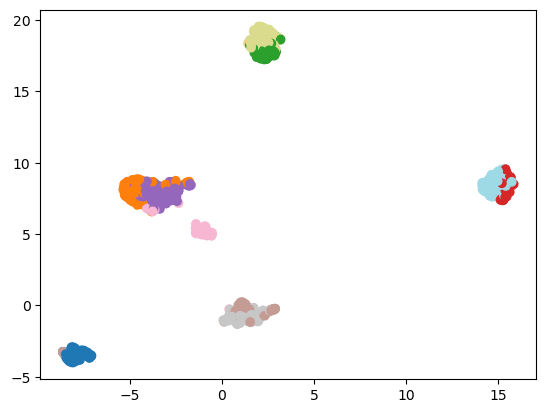

In [39]:
from sklearn.cluster import KMeans

model = KMeans(10, random_state=42)
clusters_KM = model.fit_predict(X)
plt.scatter(X_umap_42[:, 0], X_umap_42[:, 1], c=clusters_KM, cmap="tab20")

 Clusters from KMeans correspond to Umap clusters (not checked only with pictures). KMeans clusters with 5 clusters and random_state = 42 correspond at 0.9986 to the real labels hence tumours.

In [40]:
# Creation of the object
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(clusters_KM),
    X=dm_dcor,
    metric_clusters="average",
    metric_points="precomputed",
)

In [41]:
import matplotlib.patches as mpatches

patches = [mpatches.Patch(color=c, label=k) for k, c in colors_dict.items()]

In [42]:
g_prepro_pr = GraphPreprocess(cluster_g.graph)
labels_hexa = np.array(colors_hex)
g_prepro_pr.fit_nodes(type_coloring="label", color_labels=labels_hexa)
g_prepro_pr.fit_edges()
g = g_prepro_pr.graph

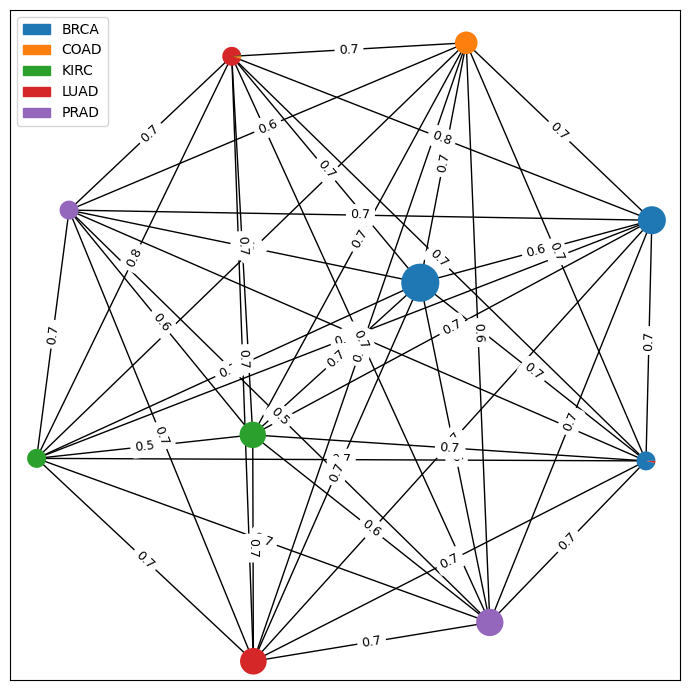

In [43]:
fig, ax = plt.subplots(figsize=(7, 7))

pos = nx.spring_layout(g, seed=42, iterations=100, scale=1, center=(0, 0))
nx.draw_networkx_edges(g, pos=pos, ax=ax)

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"]) for u, v, data in g.edges(data=True)
}
nx.draw_networkx_edge_labels(
    g, pos, edge_labels=edge_labels, font_color="black", font_size=9, ax=ax
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for node, data in g.nodes(data=True):

    attributes = g.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    ax.pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.2, 0.03),
        frame=True,
    )


plt.legend(handles=patches, loc="upper left")

ax.set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
ax.set_xlim(xlim)
ax.set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))

plt.tight_layout()
plt.show()

# Metric distortion pruning

### With 1 component in the KNN graph

In [44]:
from sklearn.neighbors import NearestNeighbors

nb = 10
neigh = NearestNeighbors(n_neighbors=nb, radius=1)
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X=X, n_neighbors=nb, mode="distance")
nn_Graph = nx.from_scipy_sparse_array(nn_adjacency, edge_attribute="label")

for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node, node)

print("Number connected components : ", nx.number_connected_components(nn_Graph))

Number connected components :  1


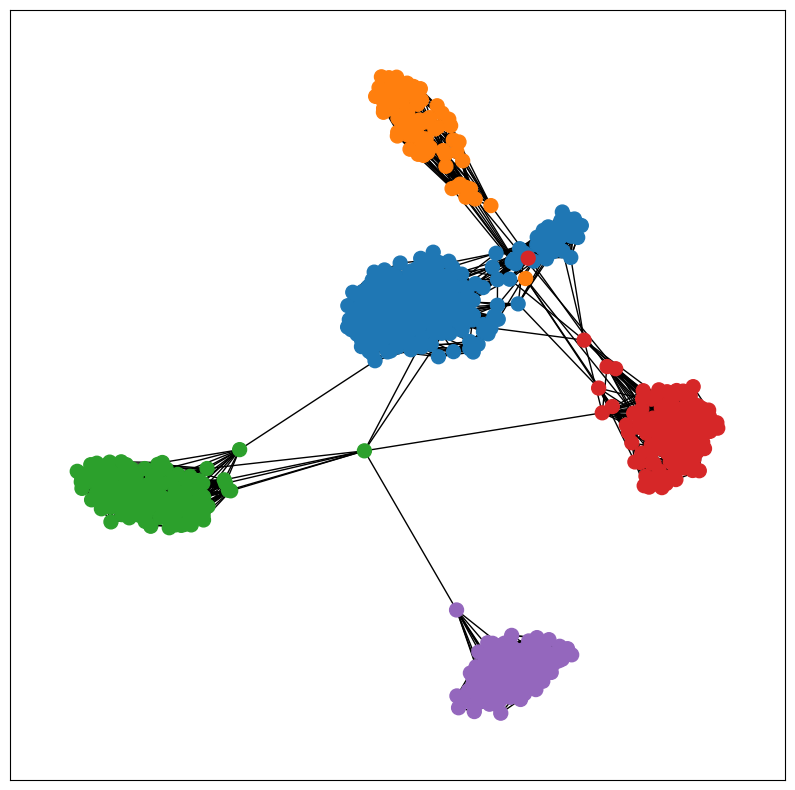

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw_networkx(nn_Graph, with_labels=False, node_color=color_points, node_size=100)

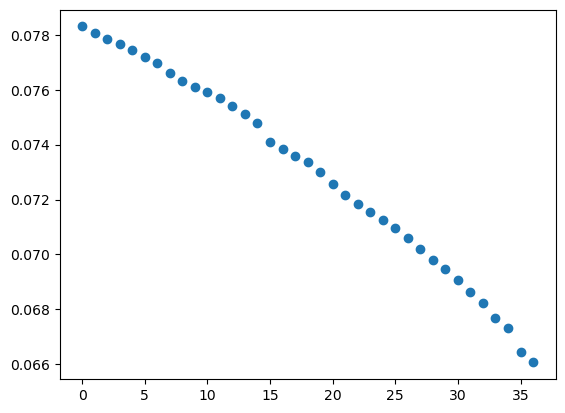

In [26]:
from clustergraph.GraphPruning import GraphPruning

gp = GraphPruning(cluster_g.graph, type_pruning="md", knn_g=nn_Graph, X=X, algo="bf")

pruned_gg, md = gp.prune(score=True, nb_edge_pruned=100)
plt.scatter(range(len(md)), md)

In [27]:
g_prepro_pr = GraphPreprocess(pruned_gg)
labels_hexa = np.array(labels_hexa)
g_prepro_pr.fit_nodes(type_coloring="label", color_labels=labels_hexa)
g_prepro_pr.fit_edges()
g_pr = g_prepro_pr.graph

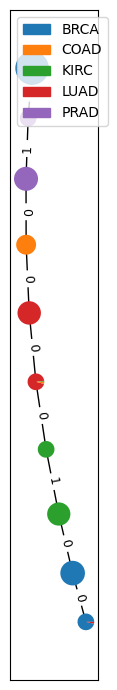

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))

pos = nx.spring_layout(g_pr, seed=42, iterations=100, scale=1, center=(0, 0))
nx.draw_networkx_edges(g_pr, pos=pos, ax=ax)

edge_labels = {
    (u, v): "{:.0f}".format(data["weight_plot"]) for u, v, data in g_pr.edges(data=True)
}
nx.draw_networkx_edge_labels(
    g_pr, pos, edge_labels=edge_labels, font_color="black", font_size=9, ax=ax
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for node, data in g_pr.nodes(data=True):

    attributes = g_pr.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    ax.pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.2, 0.03),
        frame=True,
    )


plt.legend(handles=patches, loc="upper left")

# ax.set_aspect("auto")
# xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
# ax.set_xlim(xlim)
# ax.set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))

plt.tight_layout()
plt.show()

## Connectivity pruning

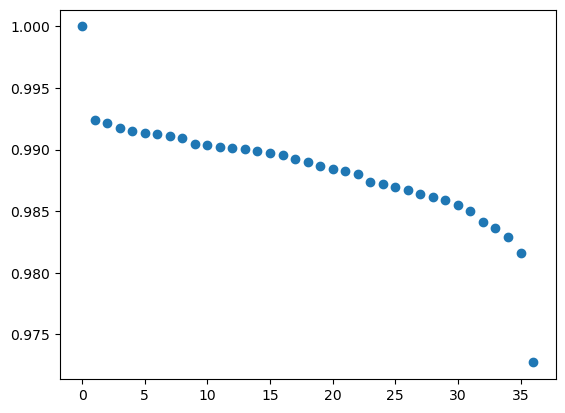

In [46]:
from clustergraph.GraphPruning import GraphPruning

gp = GraphPruning(cluster_g.graph, type_pruning="conn", algo="bf")

pruned_gg, md = gp.prune(score=True, nb_edge_pruned=-1)
plt.scatter(range(len(md)), md)

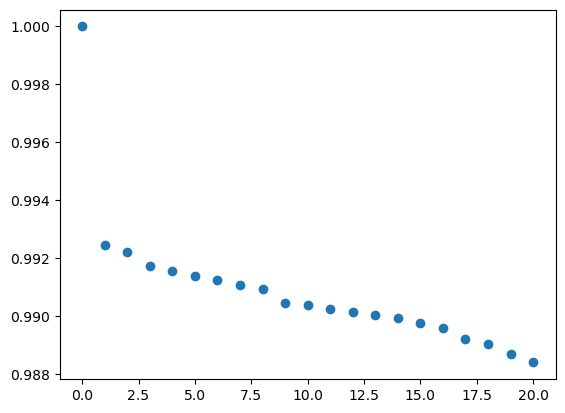

In [47]:
from clustergraph.GraphPruning import GraphPruning

gp = GraphPruning(cluster_g.graph, type_pruning="conn", algo="bf")

pruned_gg, md = gp.prune(score=True, nb_edge_pruned=20)
plt.scatter(range(len(md)), md)

In [48]:
g_prepro_pr = GraphPreprocess(pruned_gg)
labels_hexa = np.array(labels_hexa)
g_prepro_pr.fit_nodes(type_coloring="label", color_labels=labels_hexa)
g_prepro_pr.fit_edges()
g_pr = g_prepro_pr.graph

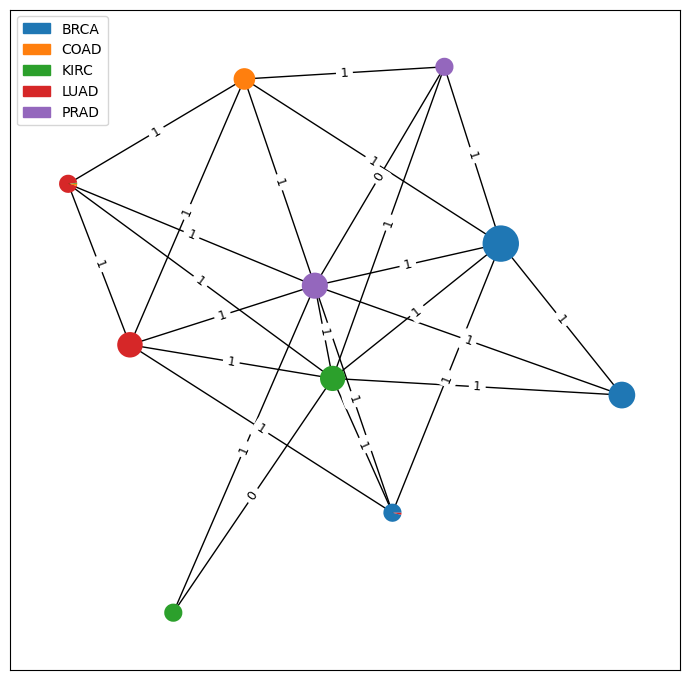

In [49]:
fig, ax = plt.subplots(figsize=(7, 7))

pos = nx.spring_layout(g_pr, seed=42, iterations=100, scale=1, center=(0, 0))
nx.draw_networkx_edges(g_pr, pos=pos, ax=ax)

edge_labels = {
    (u, v): "{:.0f}".format(data["weight_plot"]) for u, v, data in g_pr.edges(data=True)
}
nx.draw_networkx_edge_labels(
    g_pr, pos, edge_labels=edge_labels, font_color="black", font_size=9, ax=ax
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for node, data in g_pr.nodes(data=True):

    attributes = g_pr.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    ax.pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.2, 0.03),
        frame=True,
    )


plt.legend(handles=patches, loc="upper left")

# ax.set_aspect("auto")
# xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
# ax.set_xlim(xlim)
# ax.set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))

plt.tight_layout()
plt.show()